In [1]:
#general plan: get death, cases, and vaccine data for all counties combined by month
#and then plot the three of them against each other in a line graph, also by month
#do a linear regression for cases vs.vaccines, deaths vs. vaccines, deaths vs vaccine phase etc

#If there is time I can pull data from LA, Sacramento, and Humbolt counties and compare
#their vaccine rate (by population) to death and case rate

In [2]:
#import modules
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import linregress
import numpy as np
import os
import csv
from pandas.api.types import CategoricalDtype
low_memory = False


In [3]:
#read in all of the csv files and convert them to data frames

#.csv is in the file name, so put twice to read it
vac_county_path = './Resources/CHHS_Vaccines_Administered_by_County/130d7ba2-b6eb-438d-a412-741bde207e1c (1).csv'
vac_by_county = pd.read_csv(vac_county_path)
vac_by_county = pd.DataFrame(vac_by_county)

vac_cleaned_path = './Resources/ca_fully_partially_vaccinated_by_month.csv'
vac_cleaned = pd.read_csv(vac_cleaned_path)
vac_cleaned = pd.DataFrame(vac_cleaned)

cases_county_path = './Resources/ca_cases_by_county/total_monthly_cases.csv'
cases_by_county = pd.read_csv(cases_county_path)
cases_by_county = pd.DataFrame(cases_by_county)

deaths_county_path = './Resources/CA_covid_deaths_by_county/ca_covid_deaths_by_county.csv'
deaths_by_county = pd.read_csv(deaths_county_path)
deaths_by_county = pd.DataFrame(deaths_by_county)

In [4]:
#print(cases_by_county)
cases_by_county = cases_by_county.rename(columns={'Months':'month'})
cases_by_county.columns

Index(['month', 'Cases'], dtype='object')

In [5]:
deaths_by_county

,County Name,August,September,October,November,December,January,February,March,April,May,June,July
0,Statewide Unallocated,0,0,0,0,0,0,0,0,0,0,0,0
1,Alameda County,257,412,463,512,625,974,1241,1212,1263,1253,1257,1265
2,Alpine County,0,0,0,0,0,0,0,0,0,0,0,0
3,Amador County,14,16,16,16,24,33,41,45,46,46,46,48
4,Butte County,23,44,53,60,96,138,160,191,196,189,200,204
5,Calaveras County,2,14,21,22,22,23,47,50,50,55,55,57
6,Colusa County,6,6,6,6,8,10,13,14,14,14,15,16
7,Contra Costa County,175,209,246,261,331,529,681,767,795,805,816,831
8,Del Norte County,1,1,1,1,2,3,5,6,6,7,7,7
9,El Dorado County,2,4,4,4,22,79,100,105,107,110,113,116


In [6]:
#create a dataframe for deaths by month for the entire state
#from December 2020 on so that it can be compared with vaccination/cases.
#since the original df is aggregates it is necessary to subtract from the sum of 
#each month the sum of the month before it
dec = deaths_by_county['December'].sum() - deaths_by_county['November'].sum()
jan = deaths_by_county['January'].sum() - deaths_by_county['December'].sum()
feb = deaths_by_county['February'].sum() - deaths_by_county['January'].sum()
mar = deaths_by_county['March'].sum() - deaths_by_county['February'].sum()
apr = deaths_by_county['April'].sum() - deaths_by_county['March'].sum()
may = deaths_by_county['May'].sum() - deaths_by_county['April'].sum()
june = deaths_by_county['June'].sum() - deaths_by_county['May'].sum()
july = deaths_by_county['July'].sum() - deaths_by_county['June'].sum()

#print(dec)
#print(jan)
#print(feb)
#print(mar)
#print(apr)
#print(may)
#print(june)

ca_deaths_by_month = pd.DataFrame({
    'month': ['December','January','February',
    'March','April','May','June','July'],
    'Deaths':[dec,jan,feb,mar,apr,may,june,july]
})

ca_deaths_by_month

,month,Deaths
0,December,6171
1,January,15311
2,February,11282
3,March,5799
4,April,2689
5,May,1329
6,June,1078
7,July,917


In [7]:
#testing numbers------passed test----vac numbers synced with Tikaram
#c_p_and_v_data = pd.read_csv("./Resources/CA_county_population_and_vaccination_data.csv", encoding = 'utf8')

In [8]:
#drop null vaccination days and try to merge death df and cases dfwith fully vaccinated stats
vac_cleaned = vac_cleaned.dropna(how='any')
vac_cleaned

vac_cleaned_grouped = vac_cleaned.groupby('month').sum()[['fully_vaccinated','partially_vaccinated']]
vac_cleaned_grouped_df = pd.DataFrame(vac_cleaned_grouped[['fully_vaccinated','partially_vaccinated']])
vac_cleaned_grouped_df

,fully_vaccinated,partially_vaccinated
month,,
April,5917068,5482020
December,75,520210
February,2530930,3441366
January,631193,2571205
July,981594,986489
June,2187579,1139761
March,4278021,5655057
May,4517693,2401439


In [9]:
#get monthly aggregates for fully vaccinated as well as
#as totals for how many people have had at least one shot
cumulative_fully_vac = vac_by_county[['administered_date','cumulative_fully_vaccinated',
                                     'cumulative_at_least_one_dose']]
cumulative_fully_vac
cumulative_fully_vac['month'] = pd.DatetimeIndex(cumulative_fully_vac['administered_date']).month_name()

#drop the data administered column, groupby month, sum the values in each month, and turn it into a dataframe
cumulative_fully_vac = cumulative_fully_vac[['month','cumulative_fully_vaccinated','cumulative_at_least_one_dose']]
cumulative_fully_vac_grouped = cumulative_fully_vac.groupby(cumulative_fully_vac['month']).max()
cumulative_fully_vac_grouped_df = pd.DataFrame(cumulative_fully_vac_grouped)
cumulative_fully_vac_grouped_df

<ipython-input-9-2daaa264a36b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_fully_vac['month'] = pd.DatetimeIndex(cumulative_fully_vac['administered_date']).month_name()


,cumulative_fully_vaccinated,cumulative_at_least_one_dose
month,,
April,13603297,19420686
August,21538987,24857745
December,77,539074
February,3237951,6783529
January,648991,3188197
July,21386589,24590667
June,20388307,23475751
March,7592057,13100499
May,18173799,22118245


In [10]:
#getting everything sorted
vac_cleaned_grouped = vac_cleaned.groupby('month').sum()[['fully_vaccinated','partially_vaccinated']]
vac_cleaned_grouped_df = pd.DataFrame(vac_cleaned_grouped[['fully_vaccinated','partially_vaccinated']])

ca_merged_df = pd.merge(ca_deaths_by_month,vac_cleaned_grouped_df, on='month')
ca_merged_df = pd.merge(ca_merged_df,cases_by_county,on='month')
ca_merged_df = pd.merge(ca_merged_df,cumulative_fully_vac_grouped_df,on='month')
ca_merged_df

,month,Deaths,fully_vaccinated,partially_vaccinated,Cases,cumulative_fully_vaccinated,cumulative_at_least_one_dose
0,December,6171,75,520210,1216142,77,539074
1,January,15311,631193,2571205,873586,648991,3188197
2,February,11282,2530930,3441366,181288,3237951,6783529
3,March,5799,4278021,5655057,82660,7592057,13100499
4,April,2689,5917068,5482020,65037,13603297,19420686
5,May,1329,4517693,2401439,37661,18173799,22118245
6,June,1078,2187579,1139761,34899,20388307,23475751
7,July,917,981594,986489,71623,21386589,24590667


In [11]:
#This cell is will organzize the months we are analyzing by calendar placement
# instead of alphabetical order when I plot the data

month_order = CategoricalDtype(['December', 'January', 'February', 'March', 'April',
                                'May', 'June', 'July'], ordered=True)

ca_merged_df['month'] = ca_merged_df['month'].astype(month_order)
ca_merged_df = ca_merged_df.rename(columns={'month':'Month', 'fully_vaccinated':'Full Vaccinations',
                            'partially_vaccinated':'Partial Vaccinations','cumulative_fully_vaccinated':'Cumulative Fully Vaccinated',
                                           'cumulative_at_least_one_dose':'People with at Least One Dose'})


In [12]:
ca_merged_df

,Month,Deaths,Full Vaccinations,Partial Vaccinations,Cases,Cumulative Fully Vaccinated,People with at Least One Dose
0,December,6171,75,520210,1216142,77,539074
1,January,15311,631193,2571205,873586,648991,3188197
2,February,11282,2530930,3441366,181288,3237951,6783529
3,March,5799,4278021,5655057,82660,7592057,13100499
4,April,2689,5917068,5482020,65037,13603297,19420686
5,May,1329,4517693,2401439,37661,18173799,22118245
6,June,1078,2187579,1139761,34899,20388307,23475751
7,July,917,981594,986489,71623,21386589,24590667


The r-value is: -0.8532333541930609
The r-squared is: 0.7280071567075413


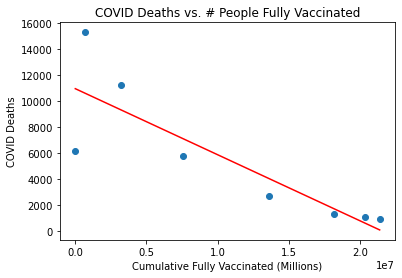

In [13]:
#show linear regression of deaths and total full vaccinations in California

x_values = ca_merged_df['Cumulative Fully Vaccinated']
y_values = ca_merged_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Deaths vs. # People Fully Vaccinated")
plt.xlabel('Cumulative Fully Vaccinated (Millions)')
plt.ylabel('COVID Deaths')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_deaths_#vacced.png')
plt.show()

The r-value is: -0.8324963312710234
The r-squared is: 0.6930501415797136


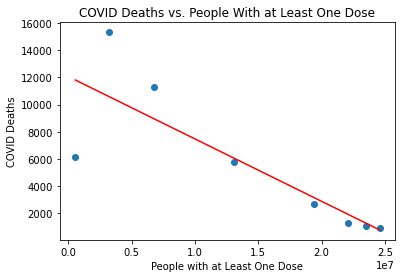

In [14]:
#show linear regression of deaths and people with at least one shot

x_values = ca_merged_df['People with at Least One Dose']
y_values = ca_merged_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Deaths vs. People With at Least One Dose")
plt.xlabel('People with at Least One Dose')
plt.ylabel('COVID Deaths')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_deaths_#dosed.png')
plt.show()

The r-value is: -0.37323083987671934
The r-squared is: 0.13930125983508132


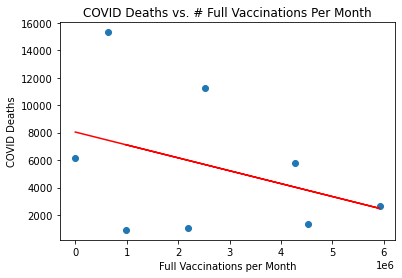

In [15]:
x_values = ca_merged_df['Full Vaccinations']
y_values = ca_merged_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Deaths vs. # Full Vaccinations Per Month")
plt.xlabel('Full Vaccinations per Month')
plt.ylabel('COVID Deaths')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_deaths_fullper_month.png')
plt.show()

The r-value is: 0.14485034975619712
The r-squared is: 0.020981623824492635


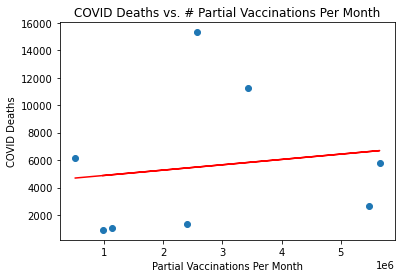

In [16]:
x_values = ca_merged_df['Partial Vaccinations']
y_values = ca_merged_df['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Deaths vs. # Partial Vaccinations Per Month")
plt.xlabel('Partial Vaccinations Per Month')
plt.ylabel('COVID Deaths')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_deaths_#partialper_month.png')
plt.show()

The r-value is: -0.7583895850058094
The r-squared is: 0.5751547626452839


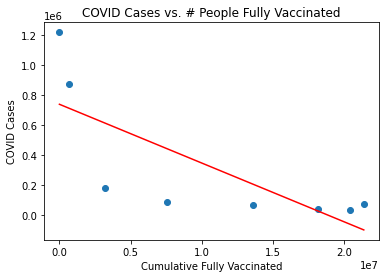

In [17]:
x_values = ca_merged_df['Cumulative Fully Vaccinated']
y_values = ca_merged_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('COVID Cases vs. # People Fully Vaccinated')
plt.xlabel('Cumulative Fully Vaccinated')
plt.ylabel('COVID Cases')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_cases_#vacced.png')
plt.show()

The r-value is: -0.8364258552960373
The r-squared is: 0.6996082114077076


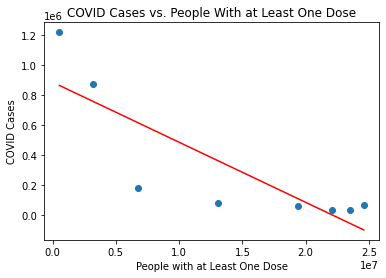

In [18]:
x_values = ca_merged_df['People with at Least One Dose']
y_values = ca_merged_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('COVID Cases vs. People With at Least One Dose')
plt.xlabel('People with at Least One Dose')
plt.ylabel('COVID Cases')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_cases_#dosed.png')
plt.show()

The r-value is: -0.6929635837792651
The r-squared is: 0.48019852844420263


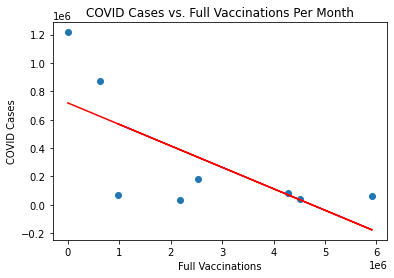

In [19]:
x_values = ca_merged_df['Full Vaccinations']
y_values = ca_merged_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Cases vs. Full Vaccinations Per Month")
plt.xlabel('Full Vaccinations')
plt.ylabel('COVID Cases')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_cases_fullper_month.png')
plt.show()

The r-value is: -0.40817801364424183
The r-squared is: 0.16660929082255888


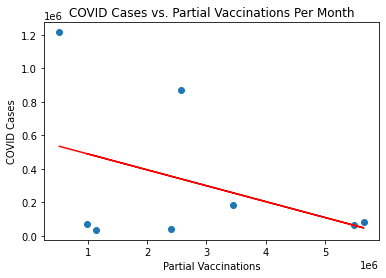

In [20]:
x_values = ca_merged_df['Partial Vaccinations']
y_values = ca_merged_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("COVID Cases vs. Partial Vaccinations Per Month")
plt.xlabel('Partial Vaccinations')
plt.ylabel('COVID Cases')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_cases_partialper_month.png')
plt.show()

The r-value is: 0.3486571944487115
The r-squared is: 0.12156183924084664


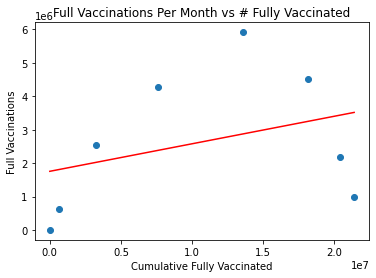

In [21]:
#show linear regression of vaccinations per month and total full vaccinations in California

x_values = ca_merged_df['Cumulative Fully Vaccinated']
y_values = ca_merged_df['Full Vaccinations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Full Vaccinations Per Month vs # Fully Vaccinated")
plt.xlabel('Cumulative Fully Vaccinated')
plt.ylabel('Full Vaccinations')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_fullper_month_#vacced.png')
plt.show()


The r-value is: 0.47853602672398887
The r-squared is: 0.2289967288727822


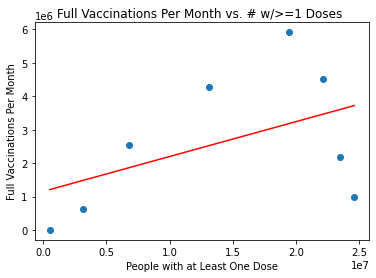

In [22]:
x_values = ca_merged_df['People with at Least One Dose']
y_values = ca_merged_df['Full Vaccinations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Full Vaccinations Per Month vs. # w/>=1 Doses ")
plt.xlabel('People with at Least One Dose')
plt.ylabel('Full Vaccinations Per Month')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_fullper_month_#dosed.png')
plt.show()


The r-value is: 0.5563014009653692
The r-squared is: 0.30947124871603243


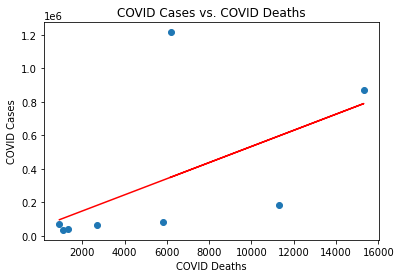

In [23]:
x_values = ca_merged_df['Deaths']
y_values = ca_merged_df['Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('COVID Cases vs. COVID Deaths')
plt.xlabel('COVID Deaths')
plt.ylabel('COVID Cases')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Resources/CA_covid_deaths_cases_vaccines_combo/Images/linreg_cases_deaths.png')
plt.show()